# Example 5.6 — Bayesian analysis of LED Accelerated Degradation with Thermal Stress

**Author:** Justin Ryan  
**Created:** 2025-09-24  
**Updated:** 2025-11-04  
**Version:** 1.1  

---
## Problem Statement

Consider the objective of **modeling and predicting the time to failure for LEDs** based on the degradation of their
relative luminosity — that is, light output expressed as a fraction of its initial value — under **accelerated thermal stress** conditions.  
An LED is considered **failed** when its relative luminosity declines to **50% of its initial value** (Hamada et al., 2008).  

The **Accelerated Degradation Test (ADT)** involves testing 25 units at three temperature levels: **25 °C, 65 °C, and 105 °C**.  
The corresponding degradation data are provided in Tables 5.13 through 5.18.

The LED degradation model proposed follows the functional form described in *Equation 5.3*, which has been
demonstrated to effectively model LED luminosity decay.  
In this model, the true degradation of luminosity at time $t$ and temperature $T$ (in Kelvin) is expressed using
the **Arrhenius acceleration factor** (Equation 4.49), allowing the transformation between accelerated and use-level times:

$$
t_{\text{use}} = t_{ij,\text{acc}} \, e^{\frac{E_a}{K} \left( \frac{1}{T_{\text{use}}} - \frac{1}{T_{i,\text{acc}}} \right)}
$$

Hence, the **degradation model** is defined as:

$$
D_i(t_{ijk}) =
\left(
1 + \gamma_0
\left[
t_{ijk,\text{acc}} \, e^{\frac{E_a}{K}
\left(
\frac{1}{T_{\text{use}}} - \frac{1}{T_{i,\text{acc}}}
\right)}
\right]^{\gamma_1}
\right)^{-1}
+ \varepsilon_{ijk}
\tag{5.13}
$$

where:  
- $D_i(t_{ijk})$: relative luminosity at time $t_{ijk}$,  
- $t_{ijk,\text{acc}}$ is the time of inspection at the $k$th temperature, the $j$th instant of inspection, and for the $i$th LED unit;
- $\gamma_0, \gamma_1$: model parameters,  
- $E_a$: activation energy,
- $T_{\text{use}}$ is the normal use temperature of **293.15 K (20 °C)**;  
- $K$: Boltzmann’s constant (**8.6174 × 10⁻⁵ eV·K⁻¹**), and  
- $\varepsilon_{ijk}$: random error termnormally distributed as $\mathcal{N}(0, \sigma^2_{\varepsilon})$.  

Using the proposed priors below estimate the **posterior mean** and **95% confidence intervals** of the degradation model parameters, including the **use-life distribution estimate** of the LED.

Priors:

- $a \sim\mathcal{LN} (7\times 10^{-4},0.5)$
- $b \sim\mathcal{LN} (0.7,0.5)$
- $E_{a}\sim\mathcal{LN} (0.3,0.3)$
- $\sigma_\varepsilon\sim\mathcal{Uniform} (0.001,1) $

---

## Solution:

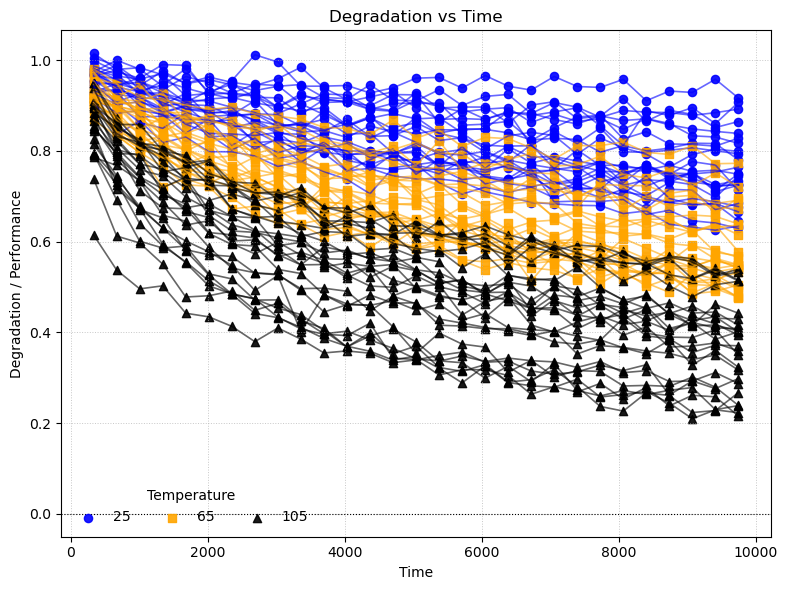

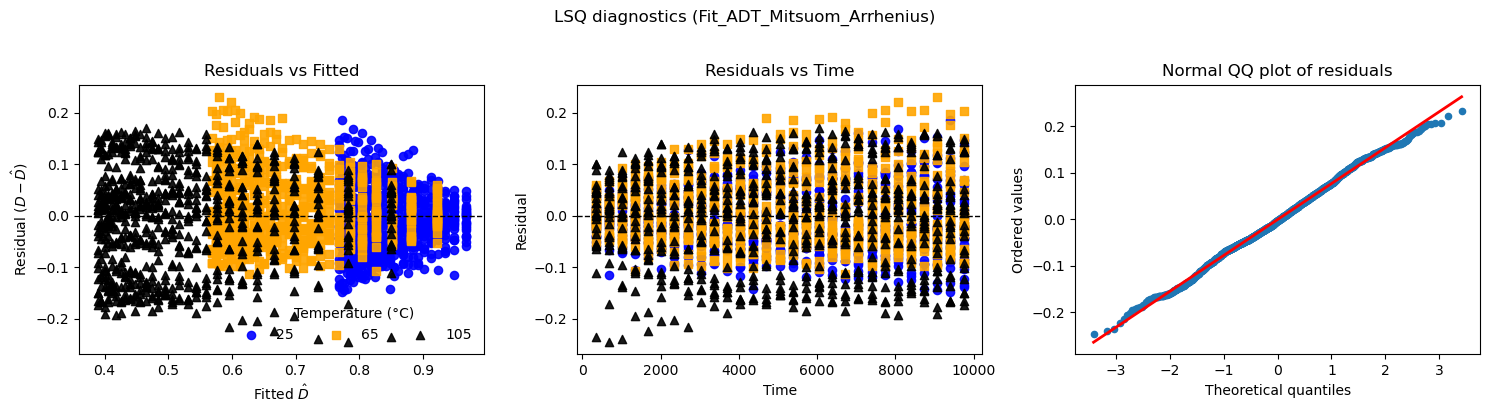

100%|█████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:52<00:00, 17.73it/s]


### Degradation / performance model

A Mitsuom-type performance model with Arrhenius temperature acceleration:

$$
D(t, T)
= \left[
  1 + a \left(
    \exp\!\left(
      \frac{E_a}{k_B}
      \left(
        \frac{1}{T_{\text{use}}}
        - \frac{1}{T}
      \right)
    \right)
    \, t
  \right)^{b}
\right]^{-1}.
$$

Performance $D(t,T)$ typically starts near 1 and decreases toward 0.

**Parameters:**

- **$a$** – scale  
- **$b$** – curvature / time exponent  
- **$E_{a}$** – activation energy (eV)

### Bayesian (multiplicative) Parameter Estimates (95% CrI)

| Parameter | Mean | Median | 95% CrI |
|-----------|------|--------|----------------|
| a | 0.000564155 | 0.000559539 | [0.000413625, 0.000720587] |
| b | 0.667972 | 0.667887 | [0.637951, 0.69943] |
| Ea (eV) | 0.315846 | 0.315599 | [0.298439, 0.332804] |
| $\sigma$ | 0.143426 | 0.143409 | [0.13903, 0.147492] |

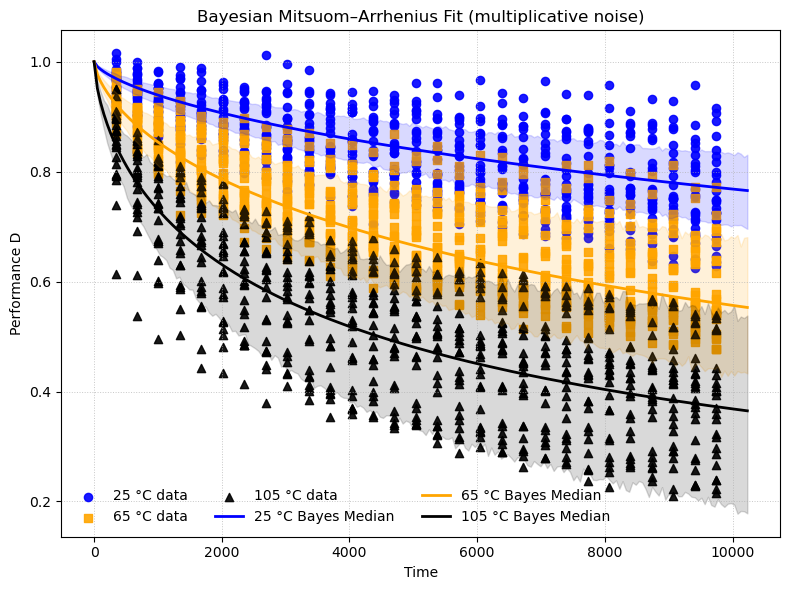

### Posterior summary for TTF at use (Df=0.5)

- Mean life: 7.9785e+04 time units
- Median life: 7.4946e+04 time units
- 95% HDI: [2.2457e+04, 1.5095e+05] time units
- 95% ETI: [2.6775e+04, 1.6078e+05] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8000/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma      Lambda  Log-likelihood   AICc    BIC       AD optimizer
       Gamma_2P 15108.9 5.28066                                                                                             -94462.6 188929 188943 0.421227       TNC
       Gamma_3P 15108.9 5.28066       0                                                                                     -94462.6 188931 188952 0.421227       TNC
Weibull_Mixture                         76900.8 3.06237  114016 2.63827     0.659668                                        -94496.1 189002 189037  2.41429       TNC
     Weibull_3P   82415 2.21309 6876.73                                                                                     -94586.4 189179 189200  19.3326       TNC
 Loglogistic_2P 73739.1 3.88822                                 

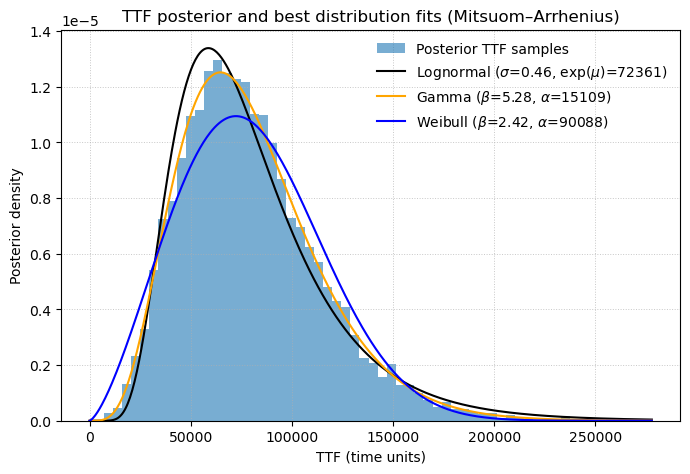

In [1]:
# EXAMPLE 5.6
# -----------------------------
import numpy as np
import pandas as pd
import sys 
sys.path.append("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/ADT Fitters Module")
# Load
df = pd.read_csv("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/Modarres Chapter Validation/Data/Example_5.6_LED_luminosity_data_long.csv")

# ---- 1) Final arrays for fitter -------------------------------------
t_time  = df["time_hr"].to_numpy(float)   # time
T_degC  = df["Temp_C"].to_numpy(float)   # stress in °C
D_obs   = df["D"].to_numpy(float)        # performance / luminosity

# Convert unit labels ("Unit 1", "Unit 2", ...) to integer IDs
unit_ids = df["unit"].astype("category").cat.codes.to_numpy()

# ---- 3) Use-conditions & failure threshold --------------------------
T_use_C = 20.0   # = 20°C (your original line)
Df = 0.50                   # failure when luminosity drops below 0.5

priors = {
    "a":    ("Lognormal", -7.3, 0.5),
    "b":    ("Lognormal", -0.5, 0.5),
    "Ea":    ("Lognormal", -1.2, 0.3),
    "sigma": ("Uniform", 0.001, 1.0)}

from ADT_fitters import Fit_ADT_Mitsuom_Arrhenius
fit = Fit_ADT_Mitsuom_Arrhenius(
    degradation=D_obs,
    stress=T_degC,
    time=t_time,
    unit = unit_ids,
    stress_use=T_use_C,
    Df=Df,
    CI=0.95,
    method="Bayesian",
    noise="Multiplicative",
    priors=priors,
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

In [2]:
fit.plot_data(save="5.6_data.png")
fit._plot_fit_Bayesian(save = "5.6_Bayes_fit.png")
fit._plot_use_TTF_distribution(unit_label="Hours", save = "5.6_TTF.png")
fit._plot_LS_diagnostics(save = "5.6_LS_Diag.png")

In [9]:
import arviz as az
import matplotlib.pyplot as plt

az.plot_trace(fit.idata_bayes)
fig = plt.gcf()                 # get current ArviZ-created figure
fig.tight_layout()
fig.savefig("5.6_trace.png", dpi=300)
plt.close(fig)
